## Feed-Forward Neural Network

In [23]:
!pip install scikeras keras h5py

In [22]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools
import pickle
from joblib import dump, load
import h5py

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

## Importing the dataset and sanity checks

In [4]:
df = pd.read_csv('features.csv')

x = df.drop(columns = ['Breed'])
y = df['Breed']
num_classes = 120
display(df.head())
print(f"Number of Breeds: {num_classes}")

,Breed,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,scottish_deerhound,2.687539,3.932317,-3.243325,2.071663,6.351608,-13.571045,3.075167,-2.453783,-4.240095,...,1.208537,0.615094,1.057965,-1.796298,0.200020,-2.279731,-0.633079,-0.158532,0.300838,-1.116885
1,scottish_deerhound,12.965803,-0.565486,0.352435,-4.360752,4.687381,-6.993444,0.196068,-6.633534,-1.871662,...,-0.742694,-0.172587,1.260740,-1.881740,0.182333,-0.560648,0.773332,-1.526032,0.450895,-0.176342
2,scottish_deerhound,22.904961,-2.710478,4.040229,1.884548,11.017559,-7.424705,0.592055,8.473251,4.439982,...,0.643105,-0.818507,-1.288865,0.393766,-0.731501,-0.225677,-1.525502,0.125807,-1.557578,0.312391
3,scottish_deerhound,19.225068,4.136729,1.859559,-2.977302,8.724263,-4.673608,1.022031,-3.917459,-1.901546,...,-1.538805,-1.504374,0.099333,0.969051,-0.389717,-1.167780,0.810620,-0.008199,-0.145861,0.090023
4,scottish_deerhound,33.098792,0.000445,10.866465,3.810472,9.132536,-7.464697,2.522165,5.504714,0.360156,...,1.228905,0.348156,-2.519471,0.090175,0.430125,-0.002680,-0.488536,0.481276,-0.982391,1.193886


Number of Breeds: 120


In [5]:
# Define hyperparameters

# TEST_SIZE = 0.4
# LEARN_RATE = 0.001
# FIRST_LAYER = 128 
# ACTIVATION_1 = 'relu'
# SECOND_LAYER = 64
# ACTIVATION_2 = 'relu'
# ACTIVATION_OUT = 'softmax'
# LOSS_TYPE = 'categorical_crossentropy'
# METRICS = ['accuracy']
# EPOCHS = 20


In [6]:
param_grid = {
    'first_layer': [2, 4, 8, 32, 64, 128],
    'second_layer': [4, 16, 32, 64],
    'activation_1': ['relu', 'tanh'],
    'activation_2': ['relu', 'tanh'],
    'activation_out': ['softmax'],
    'learn_rate': [0.0001, 0.0005, 0.001, 0.005, .01],
    'batch_size' : [20, 50, 100],
    'epochs' : [10, 20]
}
ACTIVATION_1 = 'relu'
ACTIVATION_2 = 'relu'
ACTIVATION_OUT = 'softmax'
TEST_SIZE = 0.25
EPOCHS = 20
METRICS = ['accuracy']
LOSS_TYPE = 'categorical_crossentropy'

In [7]:
x = df.drop(columns=['Breed'])
y = df['Breed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = TEST_SIZE)

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded labels to one-hot encoding
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_test = to_categorical(y_test_encoded, num_classes=num_classes)

## Creating the model framework and running a sample model

In [8]:
def create_model(first_layer=128, activation_1='relu', second_layer=64, activation_2='relu', activation_out='softmax', learn_rate=0.001):
    model = Sequential()
    model.add(Dense(first_layer, input_shape=(100,), activation=activation_1))
    model.add(Dense(second_layer, activation=activation_2))
    model.add(Dense(num_classes, activation=activation_out))
    model.compile(optimizer=Adam(learning_rate=learn_rate), loss=LOSS_TYPE, metrics=METRICS)
    return model

model = create_model()

# Train the model
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(x_test, y_test))

# Make predictions
y_pred = model.predict(x_test)


Epoch 1/20


479/479 [==============================] - 1s 1ms/step - loss: 1.8002 - accuracy: 0.5609 - val_loss: 0.8573 - val_accuracy: 0.7402
Epoch 2/20
479/479 [==============================] - 0s 956us/step - loss: 0.6949 - accuracy: 0.7842 - val_loss: 0.7426 - val_accuracy: 0.7711
Epoch 3/20
479/479 [==============================] - 0s 996us/step - loss: 0.5640 - accuracy: 0.8180 - val_loss: 0.7055 - val_accuracy: 0.7817
Epoch 4/20
479/479 [==============================] - 1s 1ms/step - loss: 0.4867 - accuracy: 0.8402 - val_loss: 0.7188 - val_accuracy: 0.7785
Epoch 5/20
479/479 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.8586 - val_loss: 0.7174 - val_accuracy: 0.7776
Epoch 6/20
479/479 [==============================] - 1s 1ms/step - loss: 0.3886 - accuracy: 0.8725 - val_loss: 0.7541 - val_accuracy: 0.7758
Epoch 7/20
479/479 [==============================] - 1s 1ms/step - loss: 0.3516 - accuracy: 0.8813 - val_loss: 0.7720 - val_accuracy: 0.7801

In [9]:
# Convert continuous predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test back to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Inverse transform the predicted and ground truth class labels to original breed names
y_pred_breed = label_encoder.inverse_transform(y_pred_classes)
y_test_breed = label_encoder.inverse_transform(y_test_classes)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(y_test_breed, y_pred_breed))

print("Classification Report : ")
print(classification_report(y_test_breed, y_pred_breed))

160/160 [==============================] - 0s 648us/step - loss: 1.1965 - accuracy: 0.7664
Test Accuracy: 0.766399085521698
Confusion Matrix for each label : 
[[[5057    7]
  [   5   38]]

 [[5042    4]
  [   3   58]]

 [[5053    1]
  [  12   41]]

 [[5054    5]
  [  13   35]]

 [[5051   15]
  [  22   19]]

 [[5067    6]
  [  19   15]]

 [[5032   13]
  [  19   43]]

 [[5054    3]
  [   9   41]]

 [[5059    8]
  [  14   26]]

 [[5028   32]
  [   5   42]]

 [[5054    1]
  [   6   46]]

 [[5047    8]
  [   1   51]]

 [[5060    4]
  [   9   34]]

 [[5050    9]
  [   7   41]]

 [[5059    4]
  [  10   34]]

 [[5055   19]
  [   4   29]]

 [[5060    2]
  [   9   36]]

 [[5059    9]
  [   4   35]]

 [[5056   11]
  [   2   38]]

 [[5070    3]
  [  14   20]]

 [[5054   14]
  [  10   29]]

 [[5070    4]
  [   6   27]]

 [[5049   14]
  [  10   34]]

 [[5068    6]
  [  12   21]]

 [[5068    7]
  [   8   24]]

 [[5037   22]
  [   9   39]]

 [[5065    8]
  [   6   28]]

 [[5060    0]
  [  13   34]]

 

In [10]:
# def perform_grid_search(x_train, y_train, x_test, y_test, param_grid):
#     best_accuracy = 0
#     best_params = {}

#     # Iterate over all combinations of hyperparameters
#     for batch_size, epoch, first_layer, second_layer, learn_rate in itertools.product(param_grid['batch_size'], param_grid['epochs'], param_grid['first_layer'], param_grid['second_layer'], param_grid['learn_rate']):
#         # Build the model
#         model = Sequential()
#         model.add(Dense(first_layer, input_shape=(100,), activation=ACTIVATION_1))  # Assuming 100 features
#         model.add(Dense(second_layer, activation=ACTIVATION_2))
#         model.add(Dense(num_classes, activation=ACTIVATION_OUT))  # num_classes is the number of unique breed labels
#         model.compile(optimizer=Adam(learning_rate=learn_rate), loss=LOSS_TYPE, metrics=METRICS)
        
#         # Train the model
#         model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, verbose=0)
        
#         # Evaluate the model
#         y_pred = model.predict(x_test)
#         accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
        
#         # Check if current combination is better than the previous best
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_params = {
#                 'batch_size': batch_size,
#                 'epochs': epoch,
#                 'first_layer': first_layer,
#                 'second_layer': second_layer,
#                 'learn_rate': learn_rate
#             }

#     return best_accuracy, best_params

# # Usage example:
# best_accuracy, best_params = perform_grid_search(x_train, y_train, x_test, y_test, param_grid)
# print("Best accuracy: %f" % best_accuracy)
# print("Best parameters:", best_params)

## Using the optimal hyperparameters

In [11]:
x = df.drop(columns=['Breed'])
y = df['Breed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = TEST_SIZE)

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded labels to one-hot encoding
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_test = to_categorical(y_test_encoded, num_classes=num_classes)

optimal = create_model(first_layer=128, activation_1='relu', second_layer=64, activation_2='relu', activation_out='softmax', learn_rate=0.0005)
optimal.fit(x_train, y_train, epochs=EPOCHS, batch_size=50, validation_data=(x_test, y_test))

# Make predictions
y_pred_opt = model.predict(x_test)

# Convert continuous predictions to class labels
y_pred_classes = np.argmax(y_pred_opt, axis=1)

# Convert one-hot encoded y_test back to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Inverse transform the predicted and ground truth class labels to original breed names
y_pred_breed = label_encoder.inverse_transform(y_pred_classes)
y_test_breed = label_encoder.inverse_transform(y_test_classes)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

multi_conf_matrix = multilabel_confusion_matrix(y_test_breed, y_pred_breed)
print("Confusion Matrix for each label : ")
print(multi_conf_matrix)

print("Classification Report : ")
print(classification_report(y_test_breed, y_pred_breed))

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)



Epoch 1/20
307/307 [==============================] - 1s 1ms/step - loss: 2.7561 - accuracy: 0.3897 - val_loss: 1.2098 - val_accuracy: 0.6791
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.9155 - accuracy: 0.7387 - val_loss: 0.8359 - val_accuracy: 0.7476
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.7902 - val_loss: 0.7338 - val_accuracy: 0.7785
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.8142 - val_loss: 0.7034 - val_accuracy: 0.7860
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.8360 - val_loss: 0.6858 - val_accuracy: 0.7885
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.8490 - val_loss: 0.6710 - val_accuracy: 0.7967
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8611 - val_loss: 0.6744 - val_accuracy: 0.7962
Epoch 

In [12]:
with open('FFNN_model.pkl', 'wb') as f:
    pickle.dump(optimal, f)

INFO:tensorflow:Assets written to: C:\Users\Kirin\AppData\Local\Temp\tmpne8x03si\assets


INFO:tensorflow:Assets written to: C:\Users\Kirin\AppData\Local\Temp\tmpne8x03si\assets


In [20]:
# Save the trained model
dump(optimal, 'FFNN_model.joblib')

INFO:tensorflow:Assets written to: C:\Users\Kirin\AppData\Local\Temp\tmpmcg2waay\assets


INFO:tensorflow:Assets written to: C:\Users\Kirin\AppData\Local\Temp\tmpmcg2waay\assets


['FFNN_model.joblib']

In [26]:
model.save("FFNN_dump.h5")

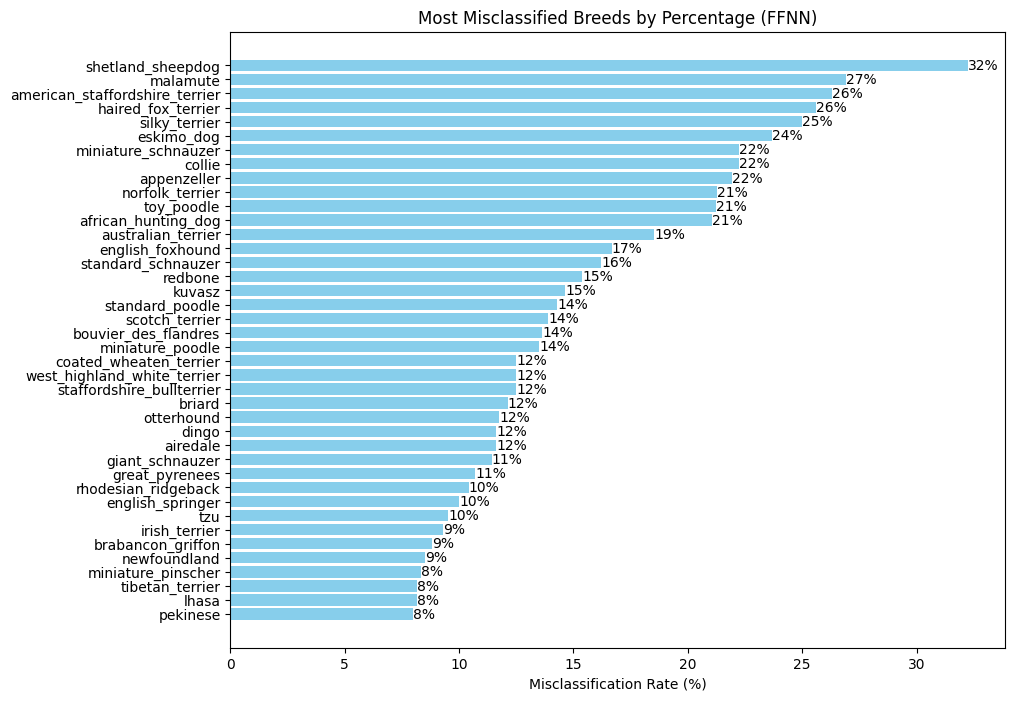

In [13]:
def plot_top_misclassified_breeds_percentage(conf_matrix, label_encoder, num_breeds=10):
    # Compute the misclassification rate for each breed
    misclassified_rates = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
    total_samples_per_breed = np.sum(conf_matrix, axis=1)
    misclassified_rates = misclassified_rates / total_samples_per_breed * 100  # Convert to percentage

    # Get the breed names from the label encoder
    breed_names = label_encoder.classes_

    # Sort the breeds based on misclassification rates
    sorted_indices = np.argsort(misclassified_rates)[::-1]

    # Select the top misclassified breeds
    selected_breeds = breed_names[sorted_indices[:num_breeds]]
    selected_misclassification_rates = misclassified_rates[sorted_indices[:num_breeds]]

    # Plot the misclassification rates
    plt.figure(figsize=(10, 8))
    bars = plt.barh(selected_breeds, selected_misclassification_rates, color='skyblue')
    plt.xlabel('Misclassification Rate (%)')
    plt.title('Most Misclassified Breeds by Percentage (FFNN)')
    plt.gca().invert_yaxis()

    # Add percentage annotations
    for bar, rate in zip(bars, selected_misclassification_rates):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{rate:.0f}%', 
                 va='center', ha='left', color='black')

    plt.show()

plot_top_misclassified_breeds_percentage(conf_matrix, label_encoder, num_breeds=40)


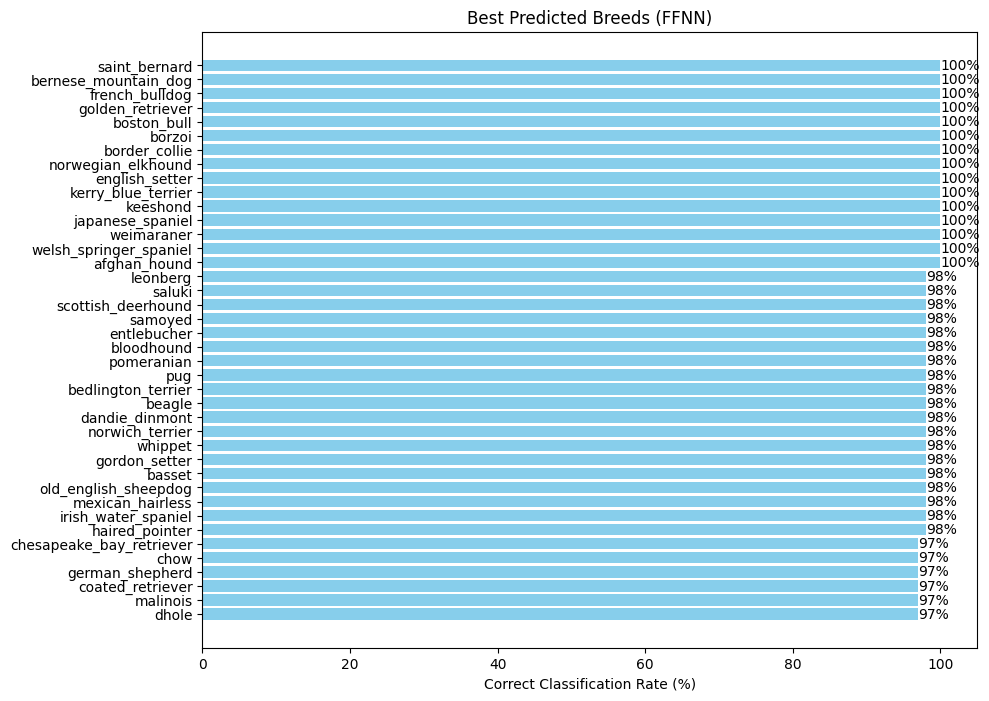

In [14]:
def plot_top_predicted_breeds_performance(conf_matrix, label_encoder, num_breeds=10):
    # Compute the correct classification rate for each breed
    correct_classification_rates = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    # Round the correct classification rates to the nearest percentage
    rounded_correct_classification_rates = np.round(correct_classification_rates * 100)

    # Get the breed names from the label encoder
    breed_names = label_encoder.classes_

    # Sort the breeds based on correct classification rates
    sorted_indices = np.argsort(correct_classification_rates)[::-1]

    # Select the top predicted breeds
    selected_breeds = breed_names[sorted_indices[:num_breeds]]
    selected_correct_rates = rounded_correct_classification_rates[sorted_indices[:num_breeds]]

    # Plot the performance rates
    plt.figure(figsize=(10, 8))
    bars = plt.barh(selected_breeds, selected_correct_rates, color='skyblue')
    plt.xlabel('Correct Classification Rate (%)')
    plt.title('Best Predicted Breeds (FFNN)')
    plt.gca().invert_yaxis()
    
    # Add percentage labels to the bars
    for bar, rate in zip(bars, selected_correct_rates):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(rate)}%', 
                 va='center', ha='left', color='black', fontsize=10)

    plt.show()

plot_top_predicted_breeds_performance(conf_matrix, label_encoder, num_breeds=40)


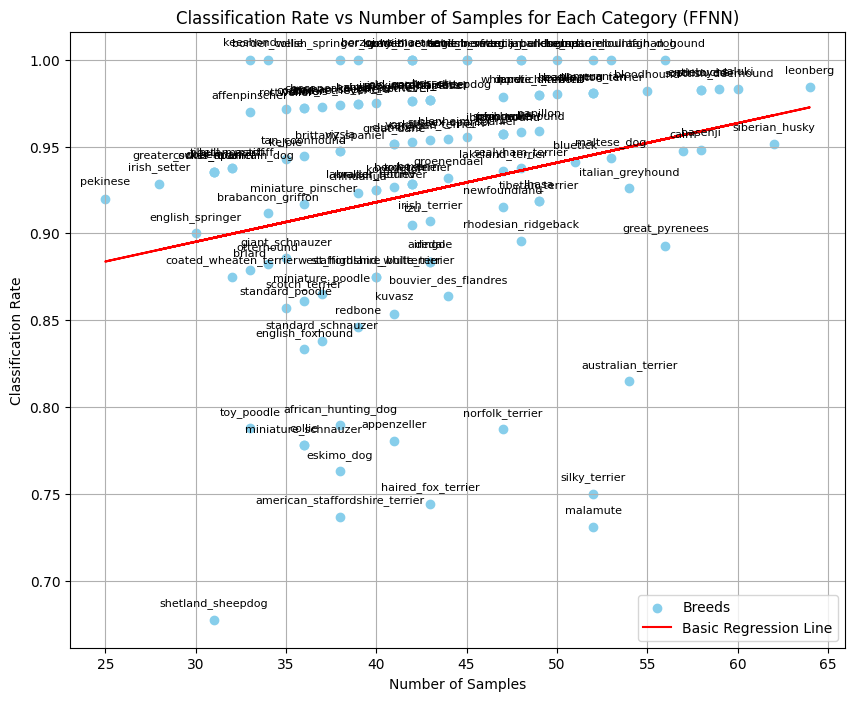

In [15]:
from sklearn.linear_model import LinearRegression

def compute_classification_rates(y_true, y_pred):
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Compute the classification rate for each breed
    correct_predictions = np.diag(conf_matrix)
    total_samples_per_breed = np.sum(conf_matrix, axis=1)
    classification_rates = correct_predictions / total_samples_per_breed

    # Get the unique breed labels
    unique_breeds = np.unique(np.concatenate([y_true, y_pred]))

    return unique_breeds, classification_rates, total_samples_per_breed

def plot_classification_rate_vs_samples(y_true, y_pred):
    breeds, classification_rates, total_samples = compute_classification_rates(y_true, y_pred)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(total_samples.reshape(-1, 1), classification_rates)

    # Plot the scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(total_samples, classification_rates, color='skyblue', label='Breeds')
    plt.xlabel('Number of Samples')
    plt.ylabel('Classification Rate')
    plt.title('Classification Rate vs Number of Samples for Each Category (FFNN)')

    # Plot the regression line
    plt.plot(total_samples, model.predict(total_samples.reshape(-1, 1)), color='red', label='Basic Regression Line')

    # Annotate each point with the breed label
    for i, breed in enumerate(breeds):
        plt.annotate(breed, (total_samples[i], classification_rates[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize = 8)

    plt.grid(True)
    plt.legend()
    plt.show()

plot_classification_rate_vs_samples(y_test_breed, y_pred_breed)


In [16]:
## Plots

<Axes: >

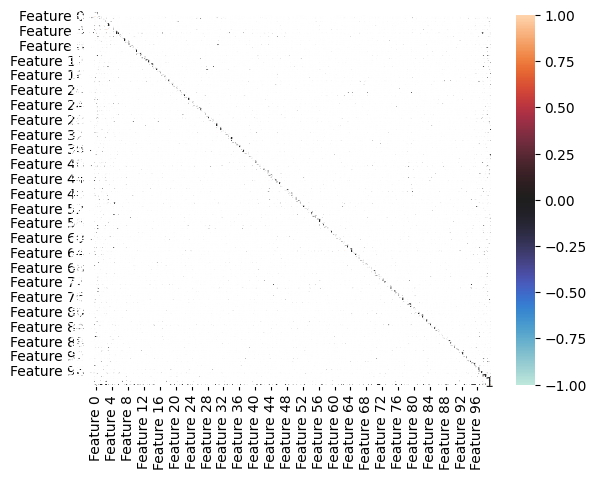

In [17]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('features.csv')
data = data = df.copy().drop(columns=['Breed']).corr()
sns.heatmap(data, annot=True, vmin=-1, vmax=1, center=0)

In [18]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
# sns.pairplot(data, hue='origin')